In [ ]:
#FB PROPHET

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from fbprophet import Prophet
plt.style.use('fivethirtyeight')

In [ ]:
df = wb.DataReader('TOFB', data_source='yahoo', start='2016-1-1')

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,4.17,4.17,4.17,4.17,300,4.17
2016-01-05,4.01,4.01,4.01,4.01,300,4.01
2016-01-06,4.01,4.01,4.01,4.01,0,4.01
2016-01-07,4.03,3.94,4.00,3.98,3600,3.98
2016-01-08,4.04,3.95,3.95,4.04,1500,4.04
...,...,...,...,...,...,...
2021-04-09,2.96,2.96,2.96,2.96,500,2.96
2021-04-12,2.96,2.96,2.96,2.96,0,2.96
2021-04-13,2.90,2.85,2.90,2.85,1500,2.85


In [ ]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,2.177323,2.080602,2.131421,2.130466,4744.799248,2.130466
std,0.511540,0.486467,0.499560,0.491645,19399.246927,0.491645
min,1.220000,1.000000,1.000000,1.100000,0.000000,1.100000
25%,1.800000,1.750000,1.790000,1.790000,300.000000,1.790000
50%,2.000000,1.910000,1.970000,1.995000,1300.000000,1.995000
75%,2.490000,2.390000,2.430000,2.400000,4400.000000,2.400000
max,4.170000,4.170000,4.170000,4.170000,553000.000000,4.170000


In [ ]:
# Add Two new columans ds & Y (closing price ( we will do forecasting on this price) for y and date for ds.)
df=df.reset_index()
df[['ds','y']]= df[['Date','Close']]

In [ ]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2016-01-04,4.17,4.17,4.17,4.17,300,4.17,2016-01-04,4.17
1,2016-01-05,4.01,4.01,4.01,4.01,300,4.01,2016-01-05,4.01
2,2016-01-06,4.01,4.01,4.01,4.01,0,4.01,2016-01-06,4.01
3,2016-01-07,4.03,3.94,4.00,3.98,3600,3.98,2016-01-07,3.98
4,2016-01-08,4.04,3.95,3.95,4.04,1500,4.04,2016-01-08,4.04
...,...,...,...,...,...,...,...,...,...
1325,2021-04-09,2.96,2.96,2.96,2.96,500,2.96,2021-04-09,2.96
1326,2021-04-12,2.96,2.96,2.96,2.96,0,2.96,2021-04-12,2.96
1327,2021-04-13,2.90,2.85,2.90,2.85,1500,2.85,2021-04-13,2.85
1328,2021-04-14,2.99,2.81,2.87,2.81,1700,2.81,2021-04-14,2.81


In [ ]:
model=Prophet()

In [ ]:
# drop the columans
prophet_df=df.drop(['Date','High','Low','Open','Close','Volume','Adj Close'], axis=1)

In [ ]:
prophet_df

,ds,y
0,2016-01-04,4.17
1,2016-01-05,4.01
2,2016-01-06,4.01
3,2016-01-07,3.98
4,2016-01-08,4.04
...,...,...
1325,2021-04-09,2.96
1326,2021-04-12,2.96
1327,2021-04-13,2.85
1328,2021-04-14,2.81


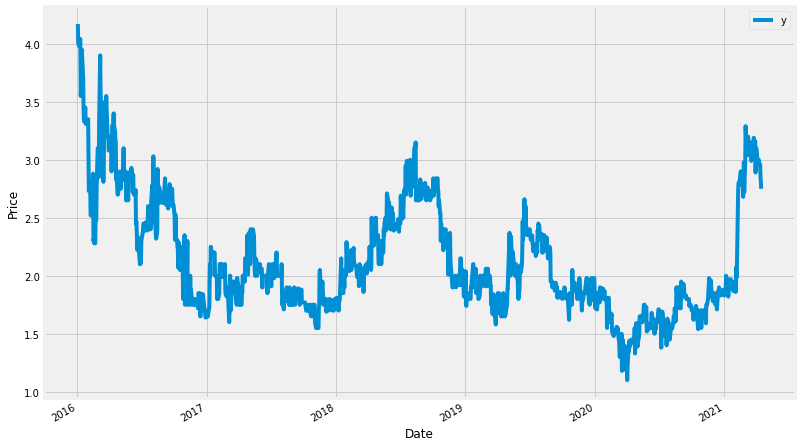

In [ ]:
ax = prophet_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [ ]:
model.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=165)

In [ ]:
future.tail()

,ds
1490,2021-09-23
1491,2021-09-24
1492,2021-09-25
1493,2021-09-26
1494,2021-09-27


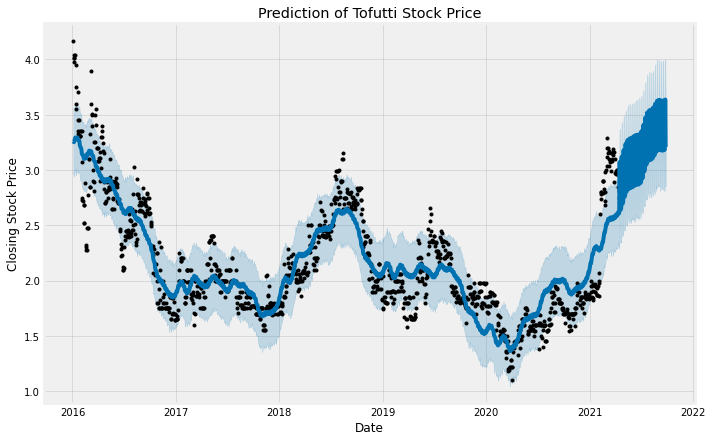

,ds,yhat,yhat_lower,yhat_upper
1490,2021-09-23,3.181859,2.816002,3.562778
1491,2021-09-24,3.188371,2.814295,3.571627
1492,2021-09-25,3.636048,3.265081,3.984066
1493,2021-09-26,3.637200,3.282717,4.001661
1494,2021-09-27,3.208578,2.853421,3.605220


In [ ]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("Prediction of Tofutti Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

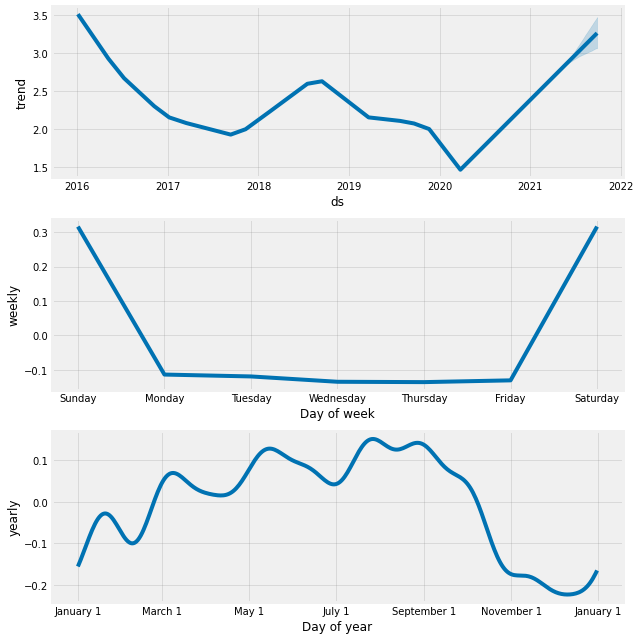

In [ ]:
model.plot_components(predictions)
plt.show()

In [ ]:
predictions=model.predict(future)
predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1490,2021-09-23,3.181859,2.818311,3.561265
1491,2021-09-24,3.188371,2.812418,3.597256
1492,2021-09-25,3.636048,3.235956,4.016010
1493,2021-09-26,3.637200,3.243741,4.028764
1494,2021-09-27,3.208578,2.805453,3.594273
